In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
N, d = X.shape

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
X_proj = pca.transform(X)
print(X.shape)
print(X_proj.shape)

(1797L, 64L)
(1797L, 2L)


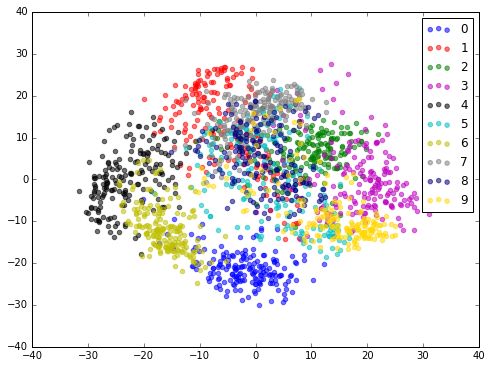

In [4]:
plt.figure(figsize = (8, 6))
colors = ['b', 'r', 'g', 'm', 'k', 'c', 'y', 'gray', 'navy', 'gold']
for k in range(10):
    plt.scatter(X_proj[y == k, 0], X_proj[y == k, 1], color = colors[k], alpha = 0.55, label = str(k))
plt.legend()    

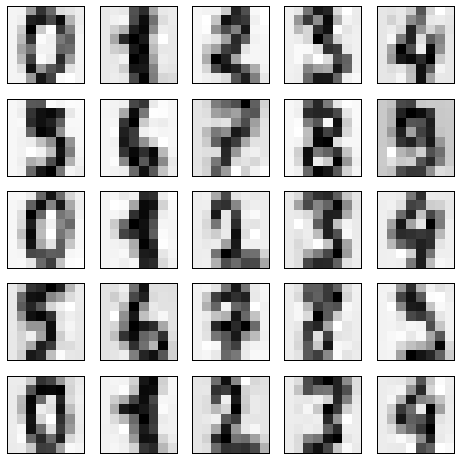

In [5]:
def plot_digits(n_components):
    plt.figure(figsize = (8, 8))
    n_subplot = 5
    
    pca = PCA(n_components)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))
    
    for i in range(n_subplot**2):
        plt.subplot(n_subplot, n_subplot, i + 1)
        plt.imshow(np.reshape(X_new[i], (8, 8)), interpolation = 'nearest')
        plt.set_cmap('binary')
        plt.xticks([])
        plt.yticks([])
    
    #plt.title("n = %2d, variance = %4.2f" % (n_components, total_var))
    
from IPython.html.widgets import interact
interact(plot_digits, n_components=[1, 64]);

### Графики дисперсии

In [6]:
pca = PCA(n_components = d)
pca.fit(X)
X_proj = pca.transform(X)

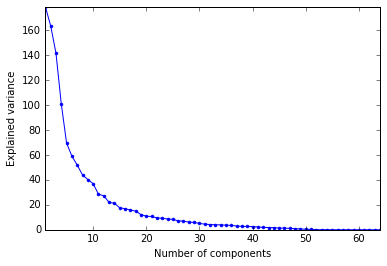

In [7]:
plt.plot(np.arange(1, d + 1), pca.explained_variance_, '.-')
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [8]:
sum_variances = np.sum(pca.explained_variance_)
cumsum_variances = np.cumsum(pca.explained_variance_)
alpha = 0.95
s = np.argmax(cumsum_variances/sum_variances > alpha) + 1 
print s

29


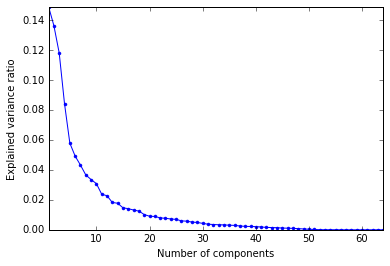

In [9]:
# pca.explained_variance_ratio_ == pca.explained_variance_/sum_variances 
plt.plot(np.arange(1, d + 1), pca.explained_variance_ratio_, '.-')
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')

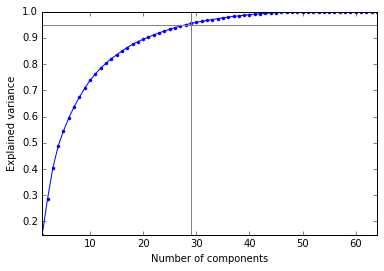

In [10]:
plt.plot(np.arange(1, d + 1), cumsum_variances/sum_variances, '.-')
plt.axhline(y = alpha, color = 'gray')
plt.axvline(x = s, color = 'gray')
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

### PCA + logistic regression

_Pipeline_ – последовательность преобразований с финальной решающей функцией (классификатором или регрессией)

Промежуточные шаги должны иметь методы `fit` и `transform`. 

Для финального шага достаточно иметь только `fit`.

In [11]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [12]:
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipeline = Pipeline(steps = [('pca', pca), ('logistic', logistic)])

In [13]:
n_components = [20, 30, 40, 50, 60, 64]
Cs = np.logspace(-4, 4, 3)

In [14]:
#Параметры для pipeline можно задавать с помощью ‘__’:
grid_search = GridSearchCV(pipeline, dict(pca__n_components = n_components, 
                                          logistic__C = Cs))
grid_search.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, n_components=None, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logistic__C': array([  1.00000e-04,   1.00000e+00,   1.00000e+04]), 'pca__n_components': [20, 30, 40, 50, 60, 64]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [15]:
print grid_search

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, n_components=None, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logistic__C': array([  1.00000e-04,   1.00000e+00,   1.00000e+04]), 'pca__n_components': [20, 30, 40, 50, 60, 64]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [16]:
print 1 - grid_search.best_score_ 
print grid_search.best_params_

0.0773511407902
{'logistic__C': 1.0, 'pca__n_components': 30}


In [17]:
print grid_search.best_estimator_

Pipeline(steps=[('pca', PCA(copy=True, n_components=30, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [18]:
print grid_search.best_estimator_.named_steps['pca'].n_components
print grid_search.best_estimator_.named_steps['logistic'].C

30
1.0
